In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from PicksBanEDAFunctions import bar_plot, windelta_pressence

In [2]:
names = dict()
with open('../data/heroes.json') as f:
    data = json.load(f)
    for i in data:
        names[i["id"]] = i['localized_name']
df_heroes = pd.DataFrame.from_dict(names, orient='index', columns=['name'])

In [3]:
df = pd.read_csv("../data/liquid_picks_bans.csv")
df_win = pd.read_csv("../data/liquid_wins.csv")
df.head(23)

,Unnamed: 0,is_pick,hero_id,team,order,ord,match_id,team_id
0,0,False,63,Team Liquid,0,0,5490431444,2163
1,1,False,110,Team Secret,1,1,5490431444,1838315
2,2,False,126,Team Liquid,2,2,5490431444,2163
3,3,False,106,Team Secret,3,3,5490431444,1838315
4,4,False,66,Team Liquid,4,4,5490431444,2163
5,5,False,20,Team Secret,5,5,5490431444,1838315
6,6,False,58,Team Liquid,6,6,5490431444,2163
7,7,False,111,Team Secret,7,7,5490431444,1838315
8,8,True,83,Team Liquid,8,8,5490431444,2163
9,9,True,65,Team Secret,9,9,5490431444,1838315


In [20]:
df_win.head()

,Unnamed: 0,match_id,winner
0,0,5490431444,Team Secret
1,1,5490337091,Team Secret
2,2,5488049930,Nigma
3,3,5487987325,Nigma
4,4,5487920183,Team Liquid


In [21]:
df_names = df.replace({'hero_id' : names})
df_names.head(10)

,Unnamed: 0,is_pick,hero_id,team,order,ord,match_id,team_id
0,0,False,Weaver,Team Liquid,0,0,5490431444,2163
1,1,False,Phoenix,Team Secret,1,1,5490431444,1838315
2,2,False,Void Spirit,Team Liquid,2,2,5490431444,2163
3,3,False,Ember Spirit,Team Secret,3,3,5490431444,1838315
4,4,False,Chen,Team Liquid,4,4,5490431444,2163
5,5,False,Vengeful Spirit,Team Secret,5,5,5490431444,1838315
6,6,False,Enchantress,Team Liquid,6,6,5490431444,2163
7,7,False,Oracle,Team Secret,7,7,5490431444,1838315
8,8,True,Treant Protector,Team Liquid,8,8,5490431444,2163
9,9,True,Batrider,Team Secret,9,9,5490431444,1838315


In [22]:
bans = df_names['is_pick'] == False
df_bans = df_names[bans]
picks = df_names['is_pick'] == True
df_picks = df_names[picks]
df_picks.head(10)

,Unnamed: 0,is_pick,hero_id,team,order,ord,match_id,team_id
8,8,True,Treant Protector,Team Liquid,8,8,5490431444,2163
9,9,True,Batrider,Team Secret,9,9,5490431444,1838315
10,10,True,Earth Spirit,Team Secret,10,10,5490431444,1838315
11,11,True,Queen of Pain,Team Liquid,11,11,5490431444,2163
14,14,True,Puck,Team Secret,14,14,5490431444,1838315
15,15,True,Disruptor,Team Liquid,15,15,5490431444,2163
16,16,True,Kunkka,Team Secret,16,16,5490431444,1838315
17,17,True,Lone Druid,Team Liquid,17,17,5490431444,2163
20,20,True,Pangolier,Team Liquid,20,20,5490431444,2163
21,21,True,Broodmother,Team Secret,21,21,5490431444,1838315


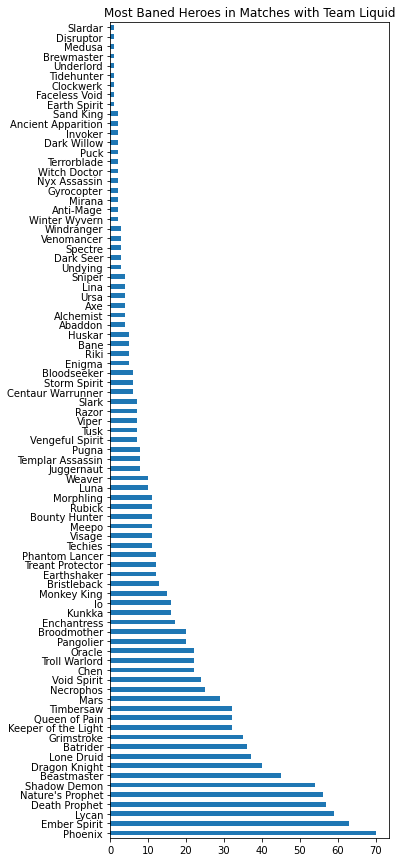

In [23]:
bar_plot(df_bans['hero_id'], "Most Baned Heroes in Matches with Team Liquid")

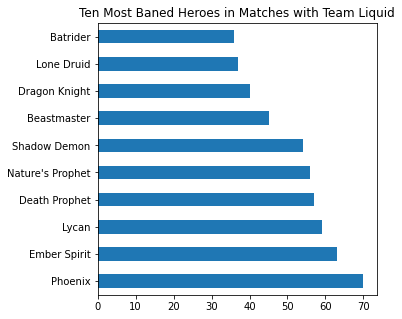

In [24]:
bar_plot(df_bans['hero_id'], "Ten Most Baned Heroes in Matches with Team Liquid", figsize=(5,5), number_col=10)

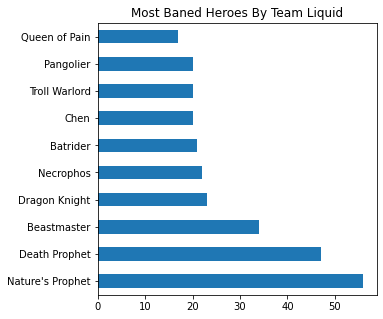

In [25]:
mask = df_bans['team'] == 'Team Liquid'
bar_plot(df_bans[mask]['hero_id'], "Most Baned Heroes By Team Liquid", figsize=(5,5), number_col=10)

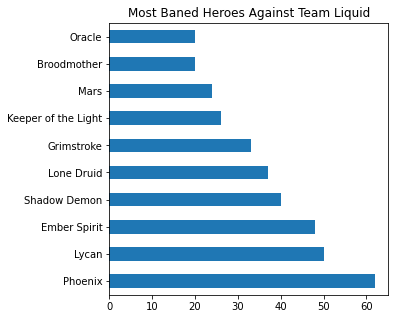

In [26]:
bar_plot(df_bans[~mask]['hero_id'], "Most Baned Heroes Against Team Liquid", figsize=(5,5), number_col=10)

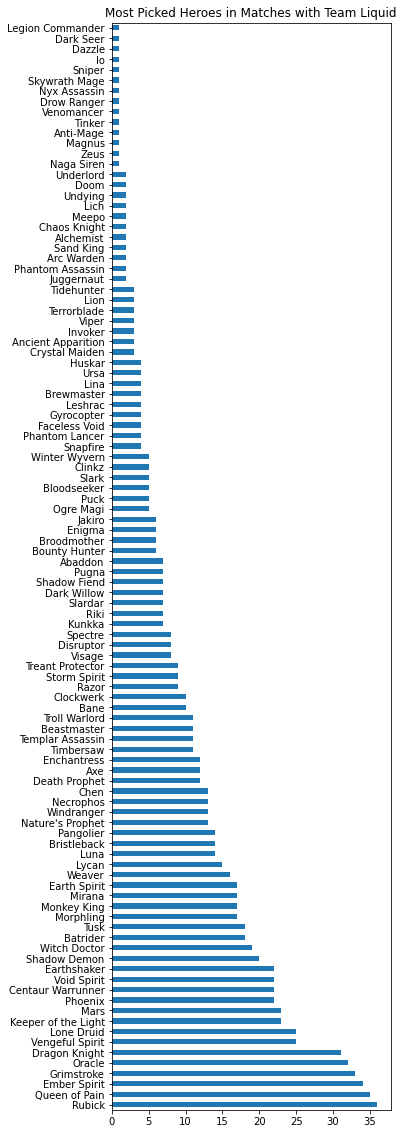

In [27]:
bar_plot(df_picks['hero_id'], "Most Picked Heroes in Matches with Team Liquid", figsize=(5,20))

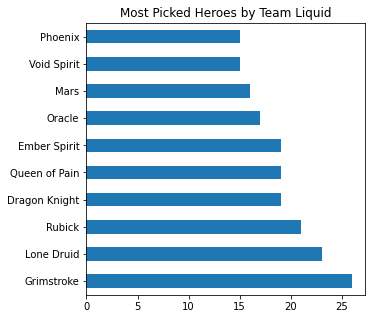

In [28]:
mask = df_picks['team'] == 'Team Liquid'
bar_plot(df_picks[mask]['hero_id'], "Most Picked Heroes by Team Liquid", figsize=(5,5), number_col=10)

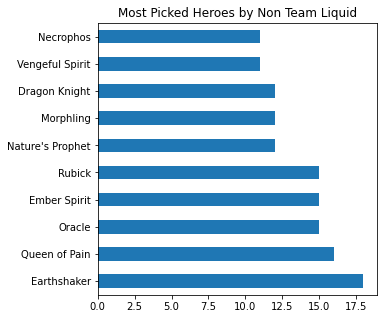

In [29]:
bar_plot(df_picks[~mask]['hero_id'], "Most Picked Heroes by Non Team Liquid", figsize=(5,5), number_col=10)

In [51]:
def plotBalance(df, team):
    df_balance = windelta_pressence(df, df_win, team, df_heroes)
    fig = px.scatter(liquid_test, x = 'pressence', y = 'win_delta', hover_data=['name'],
                    title= 'Pressence vs Win Delta for {}'.format(team))
    fig.update_layout(shapes=[
        dict(
            type= 'line',
            yref= 'paper', y0=0, y1=1,
            xref='x', x0=10/len(df_heroes), x1=10/len(df_heroes)
        ),
        dict(
            type= 'line',
            yref= 'y', y0=0, y1=0,
            xref='x', x0=0, x1=.3
        )
    ])
    fig.show()

In [53]:
plotBalance(df_picks, "Team Liquid")